# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Suryo Muqsitho
- **Email:** suryo.muqsitho@gmail.com
- **ID Dicoding:** smsitho

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman pada tahun 2011 dan 2012?
- Bagaimana perbandingan peminjam kasual dan yang terdaftar?
- Faktor apa saja yang berpengaruh terhadap banyaknya peminjaman?
- Pada musim apa peminjaman mencapai nilai tertinggi?
- Bagaimana tren peminjaman untuk setiap jamnya?




## Import Semua Packages/Library yang Digunakan

In [1]:
! pip install streamlit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from matplotlib.ticker import ScalarFormatter


## Data Wrangling

### Gathering Data

In [9]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dari kedua data set, perbedaan hanya terdapat pada kolom 'hr' atau jam  
- Dataset "day" merupakan akumulasi per hari dari dataset "hour". Oleh karena itu, akan digunakan dataset "hour" untuk analisis selanjutnya.

### Assessing Data

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
hour_df.duplicated().sum()

0

In [16]:
day_df.duplicated().sum()

0

**Insight:**
- Pada dataset "hour" terdiri dari 17379 baris tanpa adanya outlier maupun data terduplikat
- Pada dataset "day" terdiri dari 731 baris tanpa adanya outlier maupun data terduplikat

### Cleaning Data

In [17]:
# Convert date columns to datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

**Insight:**
- Karena tidak terdapat data outlier maupun duplikat, proses cleaning data hanya dilakukan untuk mengubah tipe data tanggal pada variabel "dteday"


## Exploratory Data Analysis (EDA)

### Explore hour_df

In [18]:
hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": sum ,
    "registered": sum,
    "cnt":  sum
}).sort_values(by="cnt", ascending=False)

<ipython-input-18-98be2a10472c>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hour_df.groupby(by="season").agg({


,instant,casual,registered,cnt
season,,,,
3,4496,226091,835038,1061129
2,4409,203522,715067,918589
4,4232,129782,711831,841613
1,4242,60622,410726,471348


In [19]:
hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "cnt":  sum
})

<ipython-input-19-fe189858e94b>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hour_df.groupby(by="season").agg({


,instant,temp,atemp,hum,cnt
season,,,,,
1,4242,0.299147,0.298116,0.581348,471348
2,4409,0.544663,0.520547,0.627022,918589
3,4496,0.706410,0.656004,0.633167,1061129
4,4232,0.423138,0.415738,0.667124,841613


In [20]:
hour_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "casual": sum ,
    "registered": sum,
    "cnt":  sum
}).sort_values(by="cnt", ascending=False)

<ipython-input-20-acc1c3e3b9b7>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hour_df.groupby(by="weathersit").agg({


,instant,casual,registered,cnt
weathersit,,,,
1,11413,462745,1875428,2338173
2,4544,134481,661471,795952
3,1419,22783,135548,158331
4,3,8,215,223


In [21]:
hour_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": sum ,
    "registered": sum,
    "cnt":  sum
}).sort_values(by="cnt", ascending=False)

<ipython-input-21-bc068b96a923>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hour_df.groupby(by="weekday").agg({


,instant,casual,registered,cnt
weekday,,,,
5,2487,78238,409552,487790
4,2471,61460,423935,485395
6,2512,153852,323955,477807
3,2475,57319,415729,473048
2,2453,57843,411266,469109
1,2479,70784,384719,455503
0,2502,140521,303506,444027


0 = minggu
1 = senin
2 = selasa
3 = rabu
4 = kamis
5 = jumat
6 = sabtu


In [22]:
hour_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "casual": sum ,
    "registered": sum,
    "cnt":  sum
}).sort_values(by="cnt", ascending=False)

<ipython-input-22-19fccb1ddcd4>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hour_df.groupby(by="workingday").agg({


,instant,casual,registered,cnt
workingday,,,,
1,11865,303285,1989125,2292410
0,5514,316732,683537,1000269


**Insight:**
- Berdasarkan musim, total peminjaman terbanyak terdapat pada musim gugur (fall)
- Berdasarkan cuaca, total peminjaman terbanyak terjadi saat cuaca cerah dan berawan
- Berdasarkan hari, total peminjaman terbanyak terdapat pada hari ke 5 atau hari Jumat
- Peminjaman lebih banyak dilakukan ketika hari kerja

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman pada tahun 2011 dan 2012?


Untuk menjawab pertanyaan tersebut agar hrafik terlihat lebih rapi dan simpel, akan dilakukan pengelompokkan berdasarkan bulan

In [23]:
monthly_orders_df = hour_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "dteday": "date",
    "cnt": "total"
}, inplace=True)
monthly_orders_df.head(24)
monthly_orders_df.info()

monthly_2011 = monthly_orders_df[monthly_orders_df['date'].str.contains('2011')]
monthly_2012 = monthly_orders_df[monthly_orders_df['date'].str.contains('2012')]

<ipython-input-23-23e89130b6b5>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = hour_df.resample(rule='M', on='dteday').agg({


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        24 non-null     object
 1   instant     24 non-null     int64 
 2   casual      24 non-null     int64 
 3   registered  24 non-null     int64 
 4   total       24 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [24]:
#Mengubah format tanggal menjadi nama bulan
monthly_2011["date"] = pd.to_datetime(monthly_2011["date"])
monthly_2011["date"] = monthly_2011["date"].dt.strftime('%B')
monthly_2012["date"] = pd.to_datetime(monthly_2012["date"])
monthly_2012["date"] = monthly_2012["date"].dt.strftime('%B')


<ipython-input-24-1461062d54fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_2011["date"] = pd.to_datetime(monthly_2011["date"])
<ipython-input-24-1461062d54fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_2011["date"] = monthly_2011["date"].dt.strftime('%B')
<ipython-input-24-1461062d54fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [25]:
monthly_2011.head()

,date,instant,casual,registered,total
0,January,688,3073,35116,38189
1,February,649,6242,41973,48215
2,March,730,12826,51219,64045
3,April,719,22346,72524,94870
4,May,744,31050,104771,135821


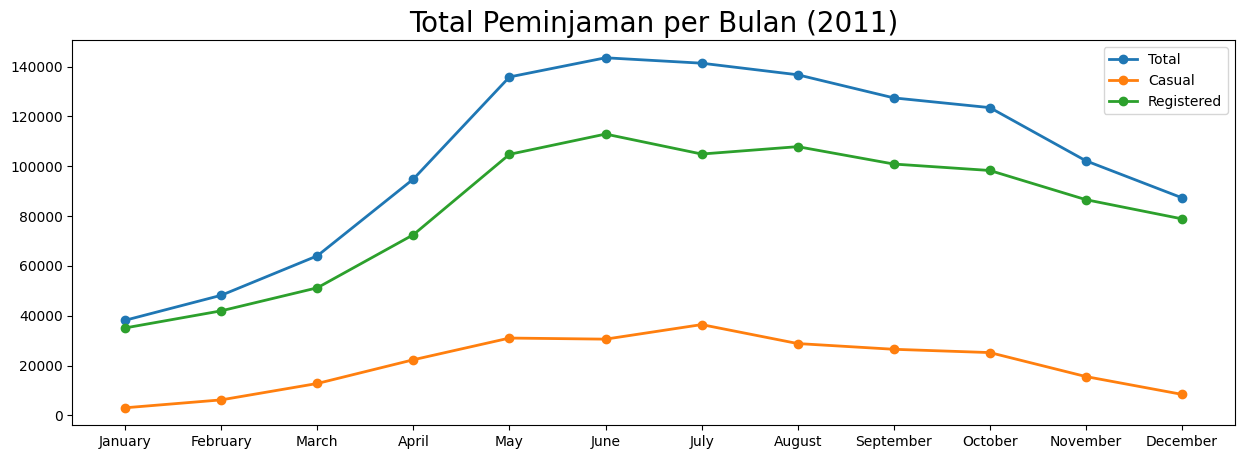

In [26]:

plt.figure(figsize=(15, 5))
plt.plot(monthly_2011["date"], monthly_2011["total"], marker='o', linewidth=2)
plt.plot(monthly_2011["date"], monthly_2011["casual"], marker='o', linewidth=2)
plt.plot(monthly_2011["date"], monthly_2011["registered"], marker='o', linewidth=2)
plt.title("Total Peminjaman per Bulan (2011)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Total', 'Casual','Registered'])
plt.show()

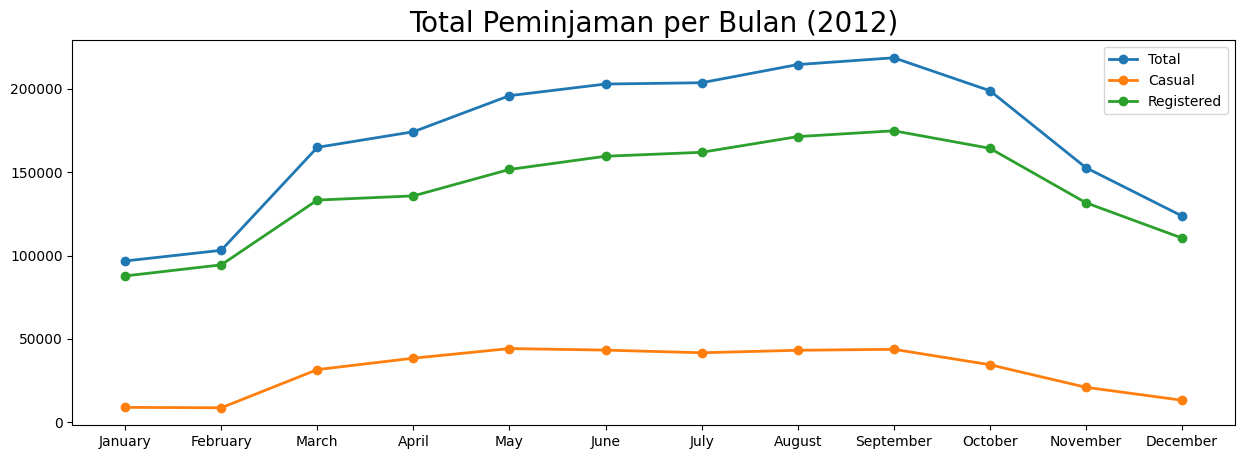

In [27]:

plt.figure(figsize=(15, 5))
plt.plot(monthly_2012["date"], monthly_2012["total"], marker='o', linewidth=2)
plt.plot(monthly_2012["date"], monthly_2012["casual"], marker='o', linewidth=2)
plt.plot(monthly_2012["date"], monthly_2012["registered"], marker='o', linewidth=2)
plt.title("Total Peminjaman per Bulan (2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Total', 'Casual','Registered'])
plt.show()

In [28]:
monthly_2011.head()

,date,instant,casual,registered,total
0,January,688,3073,35116,38189
1,February,649,6242,41973,48215
2,March,730,12826,51219,64045
3,April,719,22346,72524,94870
4,May,744,31050,104771,135821


### Pertanyaan 2: Bagaimana perbandingan peminjam kasual dan yang terdaftar?
Untuk menjawab pertanyaan tersebut, total peminjaman akan dikelompokkan berdasarkan tipe peminjam


In [29]:
total_casual = hour_df.casual.sum()
total_registered = hour_df.registered.sum()
df_total = np.array([total_casual, total_registered])
df_total

array([ 620017, 2672662])

In [30]:
df_total[0]

620017

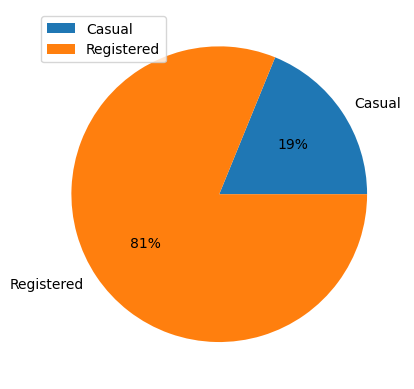

In [31]:
plt.pie(df_total,labels = ["Casual","Registered"],autopct='%1.0f%%')
plt.legend()
plt.show()

### Pertanyaan 2: Faktor apa saja yang berpengaruh terhadap banyaknya peminjaman?

Untuk menjawab pertanyaan tersebut akan dibentuk heatmap yang menampilkan korelasi antar variabel


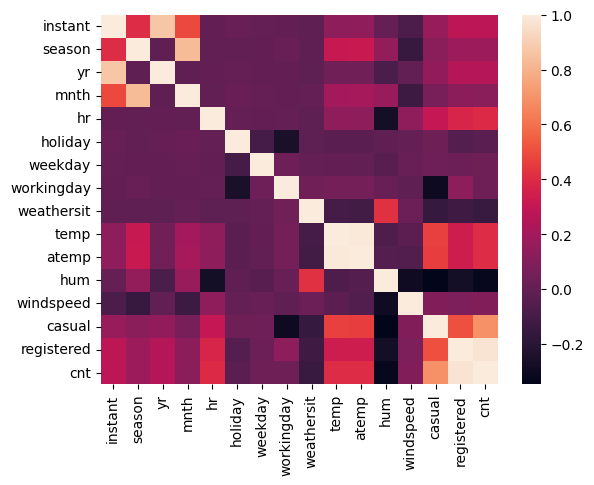

In [32]:
hour_df2 = hour_df.copy()
hour_df2 = hour_df2.drop(columns="dteday")
hour_df2.head()
sns.heatmap(hour_df2.corr())

# displaying the plotted heatmap
plt.show()

### Pertanyaan 2: Pada musim apa peminjaman mencapai nilai tertinggi?
Untuk menjawab pertanyaan tersebut, total peminjaman akan dikelompokkan berdasarkan musimnya


In [33]:
season_df = hour_df.groupby(by="season").cnt.sum().reset_index()
season_df["season"] = season_df["season"].map({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})
season_df

,season,cnt
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


<ipython-input-34-ba9b2d687091>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


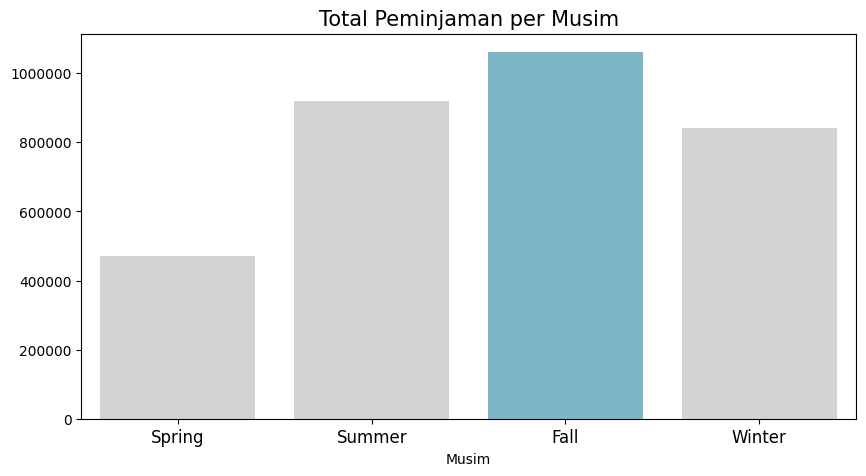

In [34]:

plt.figure(figsize=(10, 5))
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]
sns.barplot(
    x="season",
    y="cnt",
    data=season_df,
    palette=colors
)


plt.title("Total Peminjaman per Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Musim")
formatter = ScalarFormatter()
formatter.set_scientific(False)
formatter.set_useOffset(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [35]:
season_df

,season,cnt
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


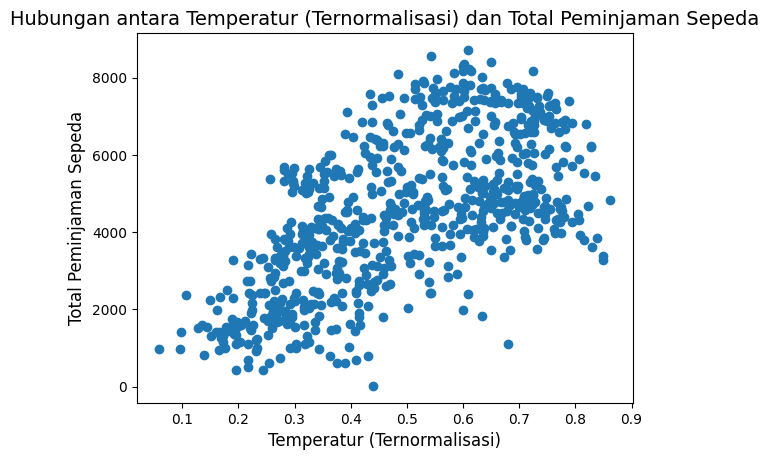

In [36]:
plt.plot(day_df['temp'], day_df['cnt'], marker='o', linestyle='')

plt.title("Hubungan antara Temperatur (Ternormalisasi) dan Total Peminjaman Sepeda", fontsize=14)
plt.xlabel("Temperatur (Ternormalisasi)", fontsize=12)
plt.ylabel("Total Peminjaman Sepeda", fontsize=12)

plt.show()

### Pertanyaan 3: Bagaimana tren peminjaman untuk setiap jamnya?
Untuk menjawab pertanyaan tersebut, akan dilakukan pengelompokkan berdasarkan jamnya

In [37]:
hourly = hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "casual": sum ,
    "registered": sum,
    "cnt":  sum
})
hourly.head()

<ipython-input-37-5289741f47dc>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hourly = hour_df.groupby(by="hr").agg({


,instant,casual,registered,cnt
hr,,,,
0,726,7375,31755,39130
1,724,4709,19455,24164
2,715,3412,12940,16352
3,697,1893,6281,8174
4,697,874,3554,4428


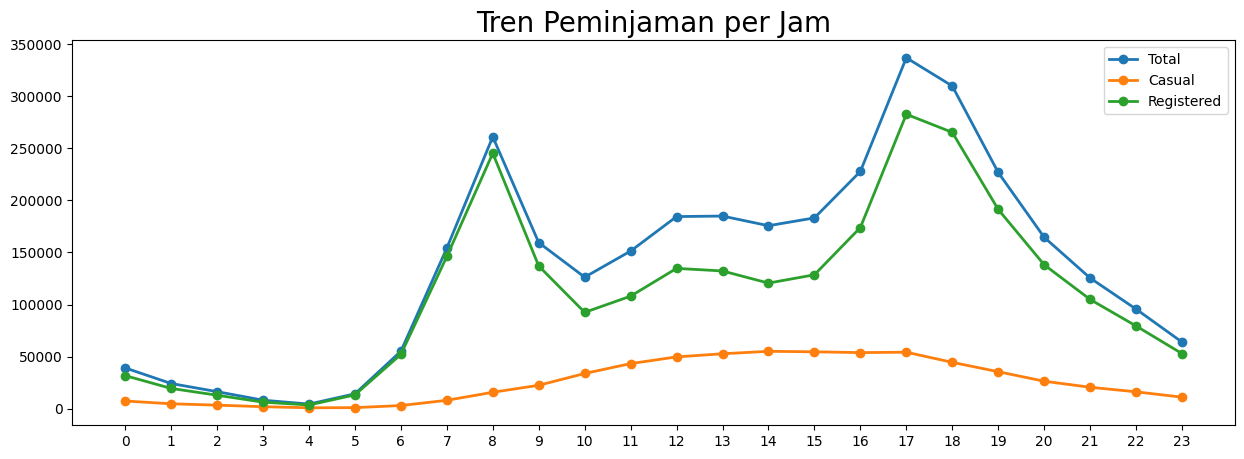

In [38]:
plt.figure(figsize=(15, 5))
plt.plot(hourly.index.get_level_values('hr'), hourly["cnt"], marker='o', linewidth=2)
plt.plot(hourly.index.get_level_values('hr'), hourly["casual"], marker='o', linewidth=2)
plt.plot(hourly.index.get_level_values('hr'), hourly["registered"], marker='o', linewidth=2)
plt.title("Tren Peminjaman per Jam", loc="center", fontsize=20)
plt.xticks(hourly.index.get_level_values('hr'))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Total', 'Casual','Registered'])
plt.show()

**Insight:**
- Dari pertanyaan - pertanyaan tersebut, terlihat bahwa tren peminjaman memiliki pola musiman dan dipengaruhi oleh beberapa faktor seperti temperatur, musim, dan jam.
-

## Analisis Lanjutan (Binning)

Analisis lanjutan yang dilakukan adalah binning yang mengelompokkan data berdasarkan rentang tertentu. Pada kasus ini saya mengelompokkan jam ke dalam rentang periode pagi, siang, sore, dan malam. Proses ini dilakukan dengan menggunakan fungsi pandas.cut. Tujuan dari dari analisis ini adalah untuk menyederhanakan variabel jam yang memiliki 23 nilai unik dan dapat mengidentifikasi pola berdasarkan rentang waktu untuk melihat pola peminjaman dengan lebih sederhana.

In [39]:
time_bins = [0 ,5, 11, 15, 19,23]
time_labels = ["Malam","Pagi", "Siang", "Sore", "Malam"]

hour_df['waktu'] = pd.cut(hour_df['hr'], bins=time_bins, labels=time_labels, right=False,ordered=False)
time = hour_df.groupby(by="waktu").cnt.sum()

<ipython-input-39-59640a07d588>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time = hour_df.groupby(by="waktu").cnt.sum()


In [40]:
hour_df.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,waktu
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Malam
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Malam
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Malam
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Malam
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Malam
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,Pagi
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,Pagi
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,Pagi
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,Pagi
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,Pagi


In [41]:
time = pd.DataFrame(time)
time = time.reset_index()
time.rename(columns={
    "cnt": "Total Peminjaman"
}, inplace=True)
time

,waktu,Total Peminjaman
0,Malam,704644
1,Pagi,770260
2,Siang,696305
3,Sore,1057529


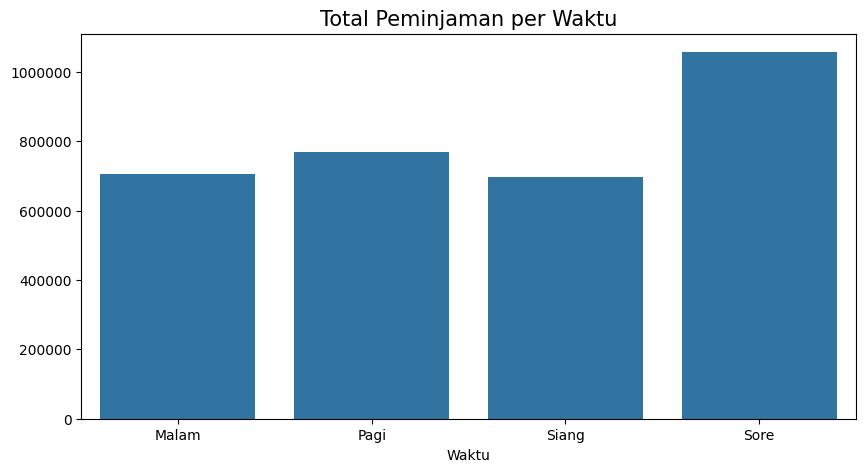

In [42]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x="waktu",
    y="Total Peminjaman",
    data=time,
)


plt.title("Total Peminjaman per Waktu", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Waktu")
formatter = ScalarFormatter()
formatter.set_scientific(False)
formatter.set_useOffset(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tick_params(axis='x', labelsize=10)
plt.show()

In [43]:
daily_orders_df = hour_df.resample(rule='D', on='dteday').agg({
        "instant": "nunique",
        "temp": "mean",
        "atemp": "mean",
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum"
    })
daily_orders_df

,instant,temp,atemp,casual,registered,cnt
dteday,,,,,,
2011-01-01,24,0.344167,0.363625,331,654,985
2011-01-02,23,0.363478,0.353739,131,670,801
2011-01-03,22,0.196364,0.189405,120,1229,1349
2011-01-04,23,0.200000,0.212122,108,1454,1562
2011-01-05,23,0.226957,0.229270,82,1518,1600
...,...,...,...,...,...,...
2012-12-27,24,0.254167,0.226642,247,1867,2114
2012-12-28,24,0.253333,0.255046,644,2451,3095
2012-12-29,24,0.253333,0.242400,159,1182,1341


In [44]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [45]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Conclusion

- Bagaimana tren peminjaman pada tahun 2011 dan 2012?

  Terlihat dari grafik peminjaman per bulan pada tahun 2011, total peminjaman mengalami kenaikan yang cukup signifikan dari bulan Januari hingga bulan Mei, kemudian mencapai puncak pada bulan Juni dan kemudian mengalami penurunan hingga akhir tahun.
  Pada grafik peminjaman per bulan pada tahun 2012, total peminjaman mengalami kenaikan dari awal tahun hingga mencapai puncak pada bulan September, terlihat juga kenaikan yang cukup signifikan terjadi antara bulan Februari dan Maret. Selanjutnya total peminjaman mengalami penurunan hingga akhir tahun.

  Terlihat juga dari kedua grafik, terdapat tren musiman yang mungkin dapat disebabkan oleh berbagai faktor seperti musim, temperatur, atau faktor lainnya.
- Bagaimana perbandingan peminjam kasual dan yang terdaftar?
  
  Dari total keseluruhan peminjaman, yaitu sebesar 3292679 peminjaman, sebesar 81% peminjaman dilakukan oleh peminjam terdaftar (2672662 peminjaman) dan 19% peminjaman dilakukan oleh peminjam kasual (620017 peminjaman)
- Faktor apa saja yang berpengaruh terhadap banyaknya peminjaman?
  
  Dari grafik heatmap yang tertera, terlihat bahwa faktor yang cukup berkorelasi terhadap variabel 'cnt' atau total peminjaman adalah variabel jam ('hr'), tahun ('yr'),temperatur ('temp' dan 'atemp'), dan musim ('season').  Alasan variabel tahun termasuk berpengaruh terhadap total peminjaman dapat disebabkan oleh jumlah data yang masih sedikit dan hanya dalam rentang 2 tahun. Terlebih, total peminjaman pada kedua tahun tersebut memiliki perbedaan yang cukup besar. Bila diasumsikan tahun 2011 merupakan tahun pertama sistem ini digunakan, hal tersebut dapat menjelaskan mengapa terdapat perbedaan total peminjaman yang cukup besar antar kedua tahun tersebut.

  Selanjutnya, terdapat korelasi antara variabel temperatur dengan musim. Dengan memperhatikan scatter plot antara variabel temperatur dan total peminjaman, terlihat bahwa seiring bertambahnya temperatur, total peminjaman juga semakin menambah, tetapi ketika temperatur mendekati nilai maksimalnya total peminjaman mengalami sedikit penurunan. Dengan demikian,  temperatur optimal adalah ketika temperatur tidak terlalu tinggi dan tidak terlalu rendah, di mana hal tersebut terjadi di saat peralihan musim panas hingga musim gugur.

- Pada musim apa peminjaman mencapai nilai tertinggi?
  Dari grafik total peminjaman per musim, terlihat bahwa musim gugur menjadi musim dengan total peminjaman tertinggi dengan total 1061129 peminjaman. Hal tersebut sejalan dengan variabel temperatur, di mana suhu pada musim gugur memiliki kecenderungan untuk tidak terlalu panas ataupun terlalu dingin.

- Bagaimana tren peminjaman untuk setiap jamnya?
  Terlihat pada grafik total peminjaman per jamnya, tren peminjaman mengalami puncak pada jam 8 dan jam 17. Hal ini dapat disebabkan karena pada jam - jam tersebut merupakan jam di mana orang - orang berangkat dan pulang dari bekerja, sekolah, atau aktivitas lainnya.

Dari beberapa kesimpulan tersebut, terdapat beberapa rekomendasi yang dapat dilakukan untuk mengoptimalkan total peminjaman.
1. Menambahkan armada pada jam - jam tertinggi seperti pada pagi hari dan sore hari.
2. Melakukan campaign promosi pada musim-musim dengan peminjaman yang relatif rendah seperti melakukan promosi pemberian minuman panas pada musim dingin atau memberikan penambahan safety pada armada saat musim dingin. Selain itu, dapat juga memberikan diskon harga pada saat musim semi atau musim dingin.
